In [74]:
import numpy as np
import os
import pandas as pd
from pathlib import Path
from keras.preprocessing import image

In [75]:
p=Path('../Image Classification/Dataset/')

In [76]:
#print(p,type(p))

In [77]:
dirs=p.glob('*')

lable_dict={'cat':0,'dog':1,'horse':2,'human':3}
image_data=[]
labels=[] 

for folder_dir in dirs:
    #print(folder_name)
    label=str(folder_dir).split("\\")[-1]
    
    for img_path in folder_dir.glob("*.jpg"):
        img=image.load_img(img_path,target_size=(32,32))
        img_array=image.img_to_array(img)
        image_data.append(img_array)
        labels.append(lable_dict[label])
    for img_path in folder_dir.glob("*.png"):
        img=image.load_img(img_path,target_size=(32,32))
        img_array=image.img_to_array(img)
        image_data.append(img_array)
        labels.append(lable_dict[label])
        
        
        

In [78]:
print(len(image_data))
print(len(labels))

288
288


In [79]:
#convert this into numpy array
image_data=np.array(image_data,dtype='float32')/255
labels=np.array(labels)
print(image_data.shape)
print(labels.shape)

(288, 32, 32, 3)
(288,)


# Randomsuffle the data

In [80]:
import random
combine=list(zip(image_data,labels))
random.shuffle(combine)

#unzip
image_data[:],labels[:]=zip(*combine)

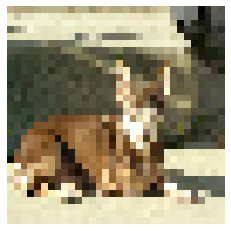

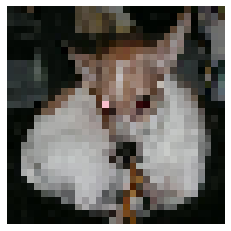

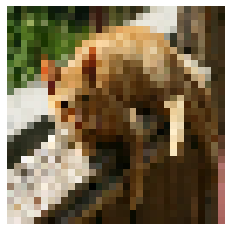

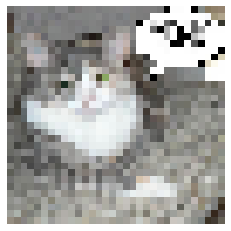

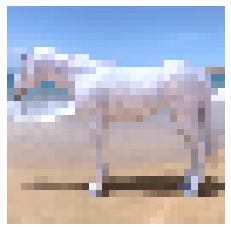

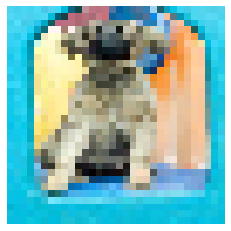

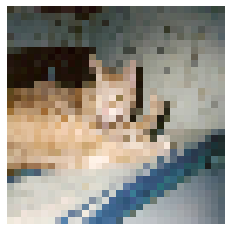

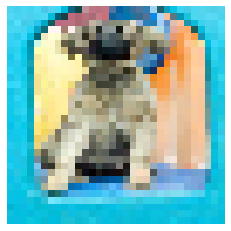

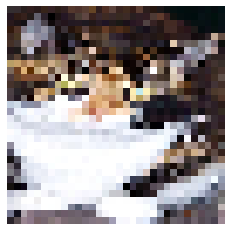

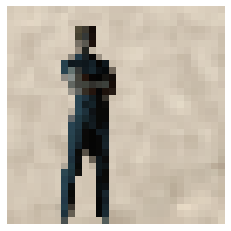

In [81]:
### visulisation of data
def drawImg(img):
    from matplotlib import pyplot as plt
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return
for i in range(10):
    drawImg(image_data[i])

In [140]:
# SVM classifier
class SVM:
    
    def __init__(self,C=1.0):
        self.C=C
        self.W=0
        self.b=0
    
    def hingloss(self,W,b,X,Y):
        loss=0
        
        loss+=.5 *np.dot(W,W.T)
        
        m=X.shape[0]
        
        for i in range(m):
            ti=Y[i]*(np.dot(W,X[i].T)+b)
            loss+=self.C *max(0,(1-ti))
        
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=100,learning_rate=0.001,maxItr=500):
        
        no_of_features=X.shape[1]
        no_of_samples=X.shape[0]
        
        n=learning_rate
        c=self.C
        
        #Init modal parameter
        W=np.zeros((1,no_of_features))
        bias=0
        
       # print(self.hingloss(W,bias,X,Y))
        
        #traing from here..
        #weight and Bias update rule that we discussed!
        losses=[]
        
        for i in range(maxItr):
            #Traning Loop
            
            l=self.hingloss(W,bias,X,Y)
            losses.append(l)
            ids=np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            #Batch Gradiendt desent with random suffling
            for batch_start in range(0,no_of_samples,batch_size):
                #assum 0 gradiend of batch
                gradw=0
                gradb=0

                for j  in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        i=ids[j]
                        ti= Y[i]*(np.dot(W,X[i].T)+bias)
                        
                        if ti>1:
                            gradw+=0
                            gradb+=0
                        else:
                            gradw+=c*Y[i]*X[i]
                            gradb+=c*Y[i]
                #Gradient for the batch is ready! update W,B
                W=W-n*W+n*gradw
                bias=bias+n*gradb
        self.W=W
        self.b=bias
        return W,bias,losses

In [141]:
## we need to convert data for One-for-One classifiction|

In [142]:
M=image_data.shape[0]
image_data=image_data.reshape(M,-1)
print(image_data.shape)
print(labels.shape)

(288, 3072)
(288,)


In [143]:
CLASSES=len(np.unique(labels))
print(type(CLASSES))
CLASSES=int(CLASSES)

<class 'int'>


In [144]:
def classWiseData(x,y):
    data={}
    
    for i in range(CLASSES):
        data[i]=[]
    
    for i in range(x.shape[0]):
        data[y[i]].append(x[i])
        
    for k in data.keys():
        data[k]=np.array(data[k])
        
    return data
    

In [145]:
data=classWiseData(image_data,labels)

In [146]:
print(data[0].shape)
print(data[0].shape[0])
print(data[1].shape[0])
print(data[2].shape[0])
print(data[3].shape[0])

(69, 3072)
69
103
47
69


In [147]:
def getDatapairForSVM(d1,d2):
    '''combines Data of two classes into a single matrix'''
    
    l1,l2=d1.shape[0],d2.shape[0]
    samples=l1+l2
    features=d1.shape[1]
    
    data_pair=np.zeros((samples,features))
    data_labels=np.zeros((samples,))
    
    data_pair[:l1,:]=d1
    data_pair[l1:,:]=d2
    
    data_labels[:l1]=-1
    data_labels[l1:]=+1
    
    return data_pair,data_labels

In [148]:
# Traning NC2 SVM's Part!

In [174]:
import matplotlib.pyplot as plt

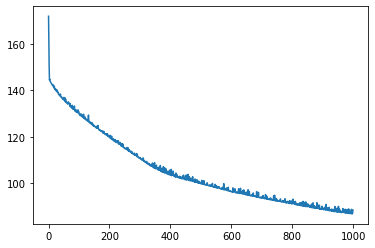

In [180]:

mySVM=SVM()
xp,yp=getDatapairForSVM(data[0],data[1])
w,b,loss=mySVM.fit(xp,yp,learning_rate=0.00001,maxItr=1000)
#print(loss)
plt.plot(loss)

In [182]:
def trainSVMs(x,y):
    svm_classifiers={}
    for i in range(CLASSES):
        svm_classifiers[i]={}
        for j in range(i+1,CLASSES):
            xpair,ypair=getDatapairForSVM(data[i],data[j])
            wts,b,loss=mySVM.fit(xpair,ypair,learning_rate=0.00001,maxItr=1000)
            svm_classifiers[i][j]=(wts,b)
            
            plt.plot(loss)
            plt.show()
            
    return svm_classifiers

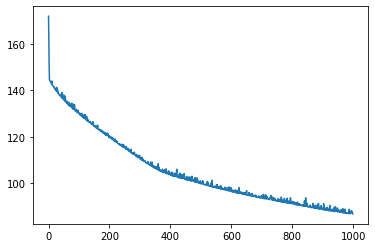

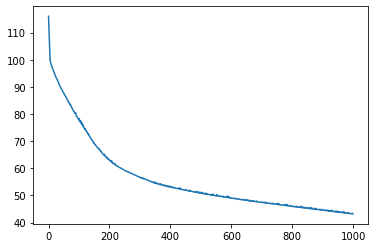

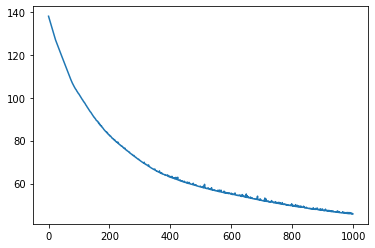

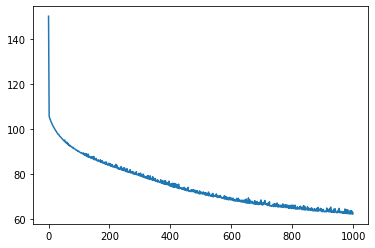

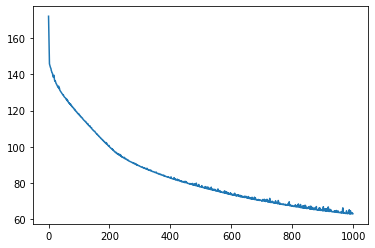

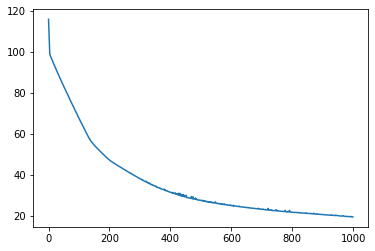

In [183]:
svm_classifiers=trainSVMs(image_data,labels)

In [184]:
#Parameters for cats and dogs
cats_dogs=svm_classifiers[0][1]
cats_humans=svm_classifiers[0][3]
print(cats_dogs[0].shape)#Waghts
print(cats_dogs[1])#bias


(1, 3072)
0.013999999999999985


In [185]:
#Prediction

In [186]:
def binaryPredict(x,w,b):
    z=np.dot(x,w.T)+b
    if z>=0:
        return 1
    else:
        return -1

In [187]:
def predict(x):
    
    count=np.zeros((CLASSES,))
    
    for i in range(CLASSES):
        for j in range(i+1,CLASSES):
            w,b=svm_classifiers[i][j]
            #Tack a majority prediction
            z=binaryPredict(x,w,b)
            
            if z==1:
                count[j]+=1
            else:
                count[i]+=1
    final_prediction=np.argmax(count)
    return final_prediction

In [188]:
print(predict(image_data[0]))
print(labels[0])


2
1


In [189]:
def accurcy(x,y):
    
    count=0
    
    for i in range(x.shape[0]):
        prediction=predict(x[i])
        if prediction==y[i]:
            count+=1
    
    return count/x.shape[0]
    

In [190]:
accurcy(image_data,labels)   #61.80555555555556

0.625

In [194]:
# diractly by svm classifier in sklearn

In [191]:

from sklearn import svm

In [192]:
svm_classifier=svm.SVC(kernel='linear',C=1.0)

In [193]:
svm_classifier.fit(image_data,labels)
svm_classifier.score(image_data,labels)

0.65625